<font size="4">
<center><b>Анализ и сегментация клиентов банка по количеству потребляемых продуктов</b></center>
</font>

**Описание проекта:** В нашем распоряжении датасет, содержащий информацию о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Данные содержат следующую информацию:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.  

В проекте нам предстоит составить портрет клиентов банка и сегментировать их по количеству потребляемых продуктов. Провести исследовательский анализ данных. Сформулировать и проверить статистические гипотезы, влияющие на отток клиентов.
________
**Цель исследования:** Выяснить причину оттока клиентов банка и составить рекомендацию для продуктового менеджера по удержанию клиентов.  
_______
**Задачи исследования:** 
- Провести исследовательский анализ данных
- Сегментировать пользователей на основе данных о количестве потребляемых продуктов и провести сравнительный анализ
- Сформулировать и проверите статистические гипотезы.

### Загрузим данные и изучим общую информацию

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [3]:
#посмотрим на данные
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#смотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
#посмотрим описательную статистику для столбцов числового типа
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Всего в данных 10000 строк и 12 столбцов. Название столбцов необходимо привести к нижнему регистру. Столбцы: CreditCard, Loyalty, Churn содержат значения 0 и 1, значит должны иметь булевой тип.  На данном этапе уже можно заметить, что в столбце Баланс отсутсвует часть данных. Кредитный рейтинг имеет разброс от 350 до 850. Возрастная категория от 18 до 92 лет. Средний и медианный возраст клиентов имеет небольшую разницу и равен 37-40 годам. Объектов в собственности от 0 до 10, в среднем 5. Баланс на счёте от 3768 до 250000, средняя и медианная величина практически равны, значит выбросы в этом столбце минимальны. Заработная плата от 11 руб до 200000 руб, в среднем - 100000 руб.**

### Предобработка данных

In [6]:
#посмотрим на процент пропущенных значений в столбцах
print(round(data.isna().sum()/len(data)*100,1))

userid               0.0
score                0.0
City                 0.0
Gender               0.0
Age                  0.0
Objects              0.0
Balance             36.2
Products             0.0
CreditCard           0.0
Loyalty              0.0
estimated_salary     0.0
Churn                0.0
dtype: float64


In [7]:
#проверим на наличие явных дубликатов
data.duplicated().sum()

0

In [8]:
#приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [9]:
#проверим, что уникальных городов всего 3
data['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [10]:
#смотрим уникальные значения в столбце количество объектов в собственности
data['objects'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [11]:
# меняем типы данных в столбцах
data['creditcard'] = data['creditcard'].astype('bool')
data['loyalty'] = data['loyalty'].astype('bool')
data['churn'] = data['churn'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  bool   
 9   loyalty           10000 non-null  bool   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 732.5+ KB


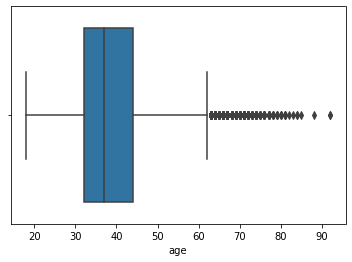

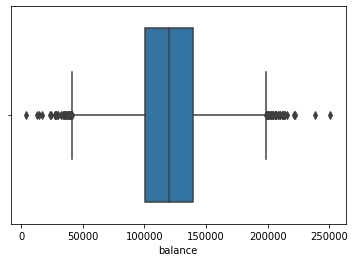

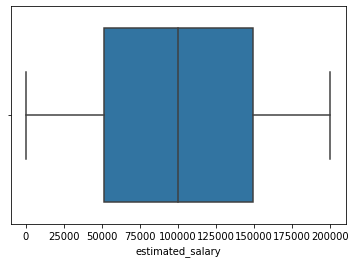

In [12]:
#строим диаграмму размаха и определим выбросы в столбцах с возрастом, балансом на счёте и ЗП
for column in ['age', 'balance', 'estimated_salary']:
    plt.figure()
    sns.boxplot(x=column, data=data)
    plt.show();

*Диаграмма размаха показала, что клиенты старше 62 лет - это аномалия. Так же клиенты с балансом до 40000 и свыше 200000 являются аномалиями. Посмотрим процент таких клиентов, от общего числа.*

In [13]:
#посмотрим процент клиентов старше 62 лет
print('Количество клиентов старше 62 лет:', len(data.query('age > 62')))
print('Процент от общего числа:', round(len(data.query('age > 62'))/len(data)*100, 2))

Количество клиентов старше 62 лет: 359
Процент от общего числа: 3.59


In [14]:
print('Количество клиентов с балансом ниже 40000 или выше 200000:', len(data.query('balance > 200000 or balance < 40000')))
print('Процент от общего числа:',len(data.query('balance > 200000 or balance < 40000'))/len(data)*100)

Количество клиентов с балансом ниже 40000 или выше 200000: 63
Процент от общего числа: 0.63


*Клиенты старше 62 лет составляют всего 3,6%. Клиентов с балансом ниже 40т.р. или выше 200 т.р. менее одного процента. Удалим выбросы, так как в сумме их не более 5%.*

In [15]:
#создадим переменную с аномалиями в столбце Баланс
anomalies = data.query('balance > 200000 or balance < 40000')
#len(anomalies)

In [16]:
#удаляем аномалии в данных
data.drop(anomalies.index, axis=0, inplace=True)
data = data.query('age <= 62')
#data.describe()

*Исследуем пропуски в столбце balance. Для этого создадим отдельный датафрэйм с пропущенными значениями в столбце Баланс. Попробуем найти закономерность и, по возможности, заменить пропуски логическими значениями.*

In [17]:
omissions = data.query('balance.isna()')
omissions.sample(10)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
553,15752060,417,Ярославль,М,34,7,NaN,2,True,False,55003.79,False
1456,15832282,639,Рыбинск,М,28,8,NaN,2,True,False,126561.07,False
2486,15787737,683,Рыбинск,Ж,36,7,NaN,2,True,False,104786.59,False
2766,15719953,705,Ярославль,М,30,1,NaN,1,True,True,181300.32,False
4605,15628335,530,Ярославль,Ж,34,8,NaN,2,False,True,141872.52,False
7065,15610898,527,Рыбинск,М,53,8,NaN,1,True,True,51711.57,False
7041,15796327,438,Ярославль,М,38,2,NaN,2,True,False,136859.55,False
7899,15726296,642,Ярославль,Ж,40,7,NaN,2,True,False,183963.34,False
5001,15692090,754,Рыбинск,М,35,4,NaN,2,True,True,9658.41,False
2567,15677976,553,Ярославль,М,42,1,NaN,2,False,False,23822.04,False


In [18]:
#смотрим относительное распредление пропущенных значений по городу, количеству продуктов, лояльности и оттоку
for column in ['city','products','creditcard','loyalty', 'churn']:
    print(column)
    print(round(omissions[column].value_counts(normalize=True),2))
    print()    

city
Ярославль    0.67
Рыбинск      0.33
Name: city, dtype: float64

products
2    0.72
1    0.25
3    0.03
4    0.00
Name: products, dtype: float64

creditcard
True     0.72
False    0.28
Name: creditcard, dtype: float64

loyalty
True     0.5
False    0.5
Name: loyalty, dtype: float64

churn
False    0.86
True     0.14
Name: churn, dtype: float64



*Баланс отсутствует чаще всего у клиентов с 2мя продуктами, в 86% случаев это действующие клиенты банка, в 72% клиенты имеют кредитную карту. Так же все клиенты либо из Ярославля, либо из Рыбинска. Посмотрим распределение по рейтингу, возрасту, заработной плате и количеству объектов в собственности.*

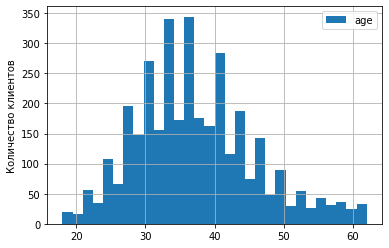

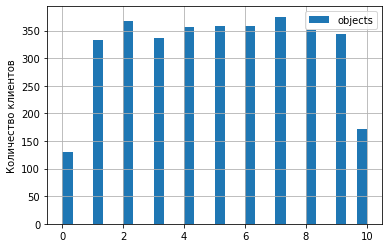

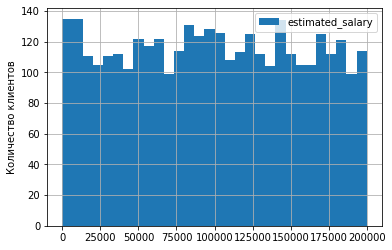

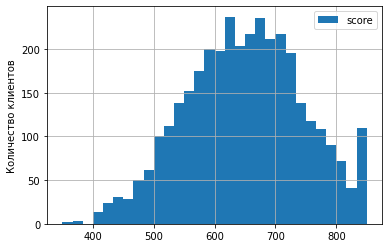

In [19]:
for column in ['age','objects', 'estimated_salary', 'score']:
    omissions.plot(y = column, kind = 'hist', bins = 30, grid = True)
    plt.ylabel('Количество клиентов')

*По представленным диаграммам установить зависимость пропусков от рейтинга, возраста, заработной платы и количеству объектов в собственности не удалось. Все они распределены равномерно. Оставим пропуски в данных без изменений, так как заменить их логически не представляется возможным.*

**На этапе предобработки данных были изменены названия столбцов, типы данных в столбцах. Изучены и удалены выбросы в данных. Так же была попытка найти логическое объяснение пропусков, но по итогу, установить взамосвязь между пропусками и данными других столбцов не удалось. В результате чего решено было оставить пропуски без изменений, дабы не заменять их синтетическими значениями и не исказить дальнейший анализ.**

### Исследовательский анализ данных

#### Посмотрим общий портрет клиентов банка.

In [20]:
data

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,False,True,112542.58,False
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,True,False,113931.57,True
3,15744090,699,Ярославль,Ж,39,1,NaN,2,False,False,93826.63,False
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,True,True,79084.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,True,False,96270.64,False
9996,15612628,516,Ярославль,М,35,10,57369.61,1,True,True,101699.77,False
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,False,True,42085.58,True
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,True,False,92888.52,True


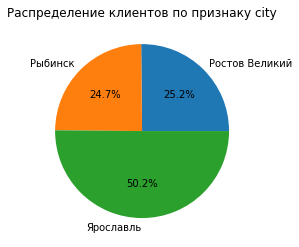

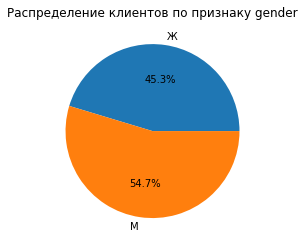

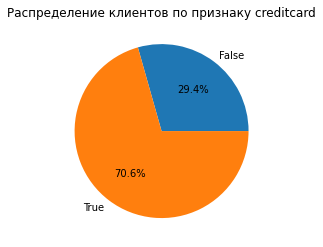

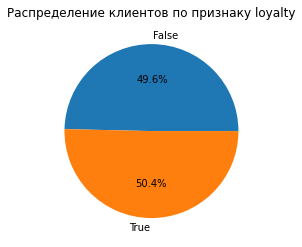

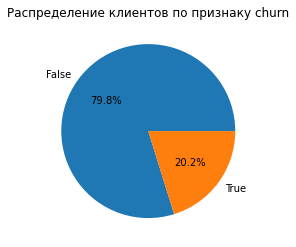

In [21]:
for column in ['city','gender','creditcard','loyalty','churn']:
    df = data.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df['userid'], labels=df.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

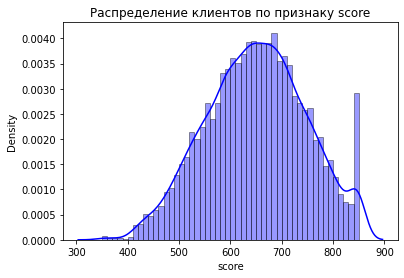

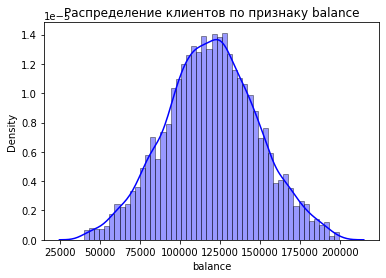

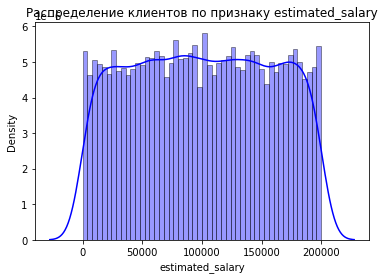

In [22]:
for column in ['score','balance','estimated_salary']:
    sns.distplot(data[column], hist=True,  bins=50, color = 'blue', hist_kws={'edgecolor':'black'})
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

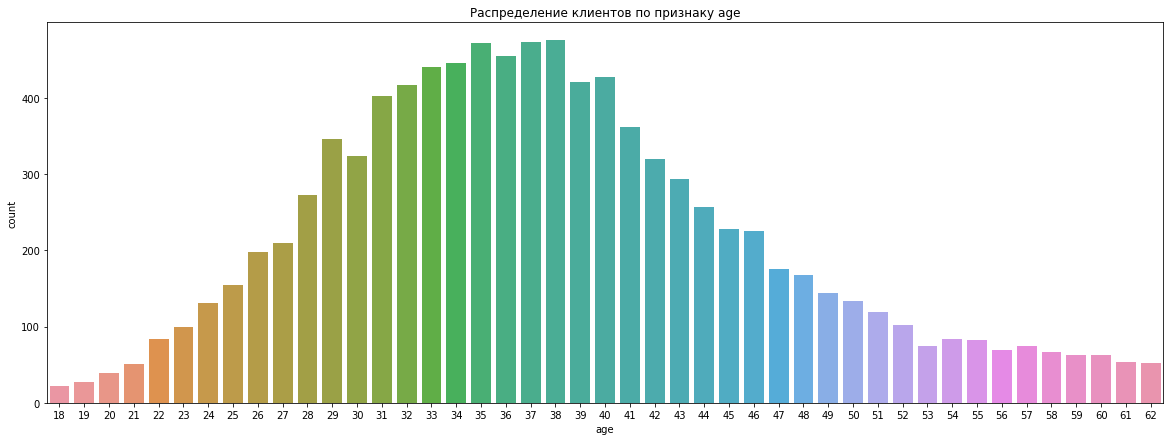

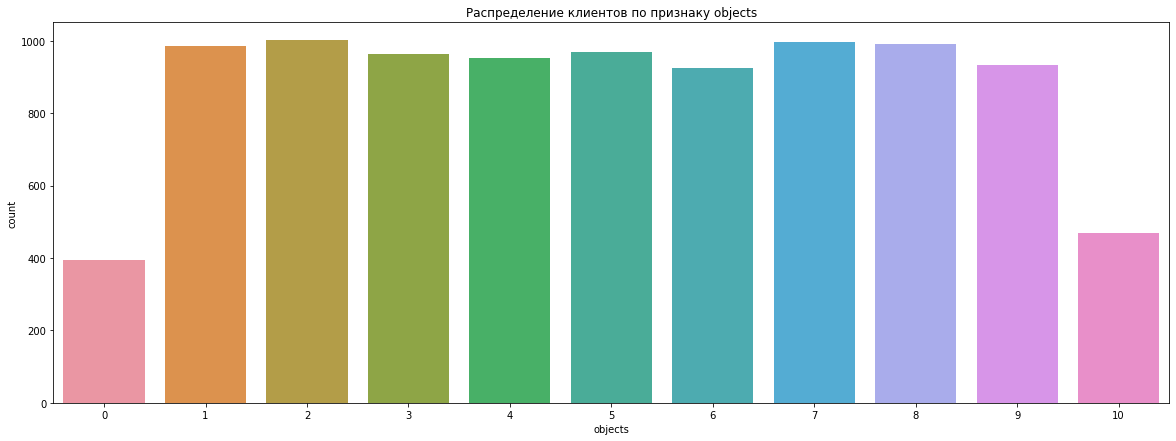

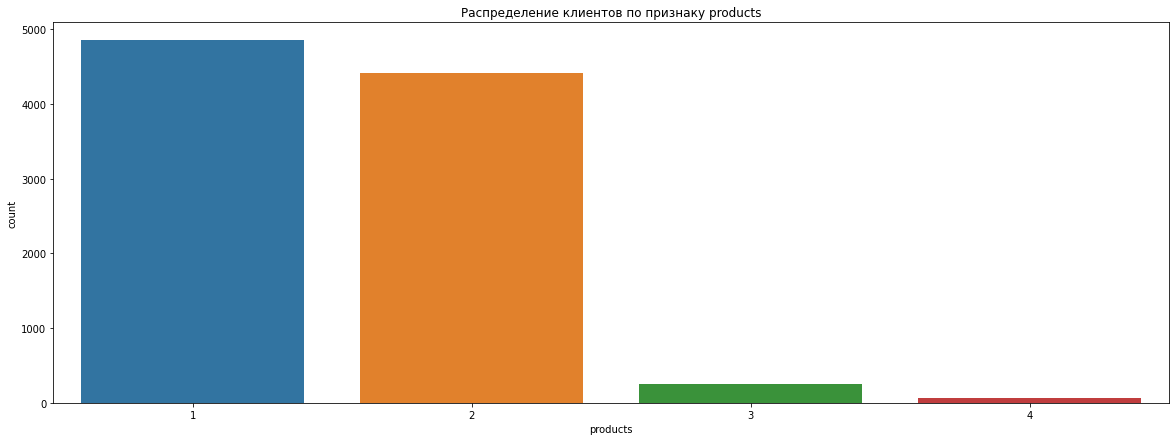

In [23]:
for column in ['age','objects', 'products']:
    plt.figure(figsize=(20,7))
    sns.countplot(data[column])
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

*Из представленных графиков можно сказать следующее: половина клиентов банка обслуживаются в г.Ярославль, в Рыбинске и Ростове по 25% от общего числа. Среди клиентов мужчин чуть больше - 54%. Кредитная карта есть у 70% клиентов. Лояльными в банке считают 50% от общего числа клиентов. Отток клиентов из банка составляет 20%. Большинство клиентов имеют кредитный рейтинг от 600 до 700, так же много клиентов (около 300) имеют максимальный кредитный рейтинг. Остаток на балансе имеет нормальное распределение, пик баланса приходится на сумму 120-130 т.р. Заработная плата клиентов распределена равномерно на всем диапозоне от 11 руб до 200 т.р. Возраст клиентов так же имеет нормальное распределние, пик приходится на 35-38 лет. От 1 до 9 объектов в собственности имеют примерно равное количество клиентов. БОльшая часть клиентов пользуются либо одним, либо двумя продуктами банка.*

#### Анализ оттока клиентов

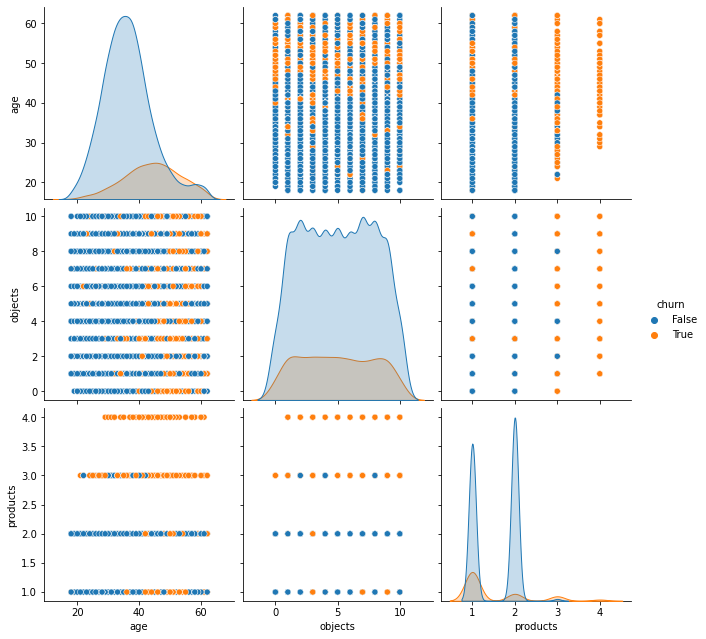

In [24]:
sns.pairplot(data[['age','objects', 'products','churn']], hue='churn', size=3);

*На графиках видим, что возраст ушедших клиентов смещен вправо, относительно распределения оставшихся клиентов. Это говорит нам о том, что чаще уходили люди старше 40 лет. По количеству объектов собственности распределение идет аналогично тому, как и у оставшихся в банке клиентов. А вот по количеству используемых продуктов отчетливо видно, что клиенты с 4мя продуктами все до единого  ушли из банка, при чем это были люди всех возрастов от 30 лет и старше, которые имели в собственности от 1 до 10 объектов. Из тех, кто пользовался 3 продуктами банка, бОльшая часть тоже ушли, независимо от возраста. Реже всего уходят клиенты с 2мя продуктами, в основном это люди старше 40, имеющие в собственности 3 объекта недвижимости. Клиенты с одним продуктом уходят чуть чаще, чем с двумя. Их характеризует наличие в собственности 3, 7 и 9 объектов недвижимости и возраст от 40 до 55 лет.*

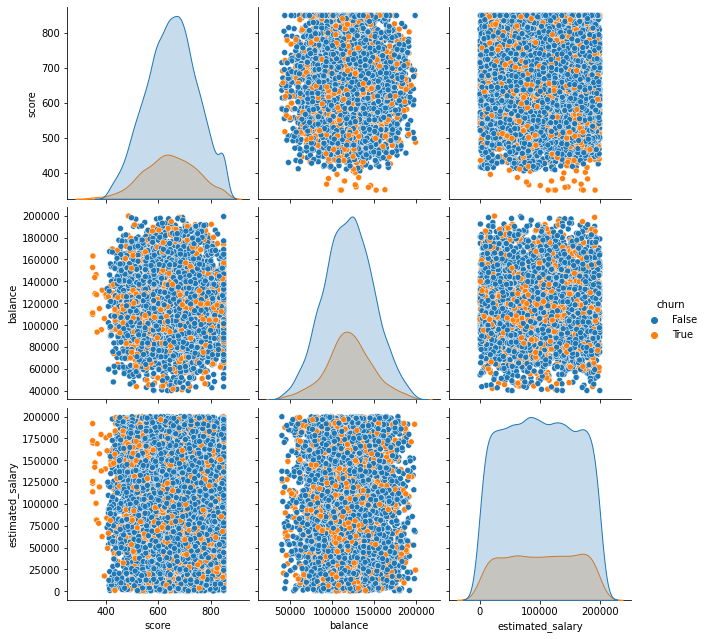

In [25]:
sns.pairplot(data[['score','balance','estimated_salary','churn']], hue='churn', size=3);

*На графиках выше представлена зависимость по признакам: рейтинг, остаток на балансе, заработная плата у тех кто ушел и остался. Мы можем тут увидеть, что все клиенты с рейтингом ниже 400 ушли из банка, независимо от баланса на карте и ЗП. Баланс на карте у ушедших клиентов ничем не отличается от тех, кто остался. По заработной плате зависимоти тоже не прослеживается- она идентична тем, кто остался.*

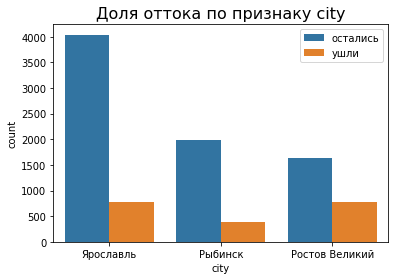

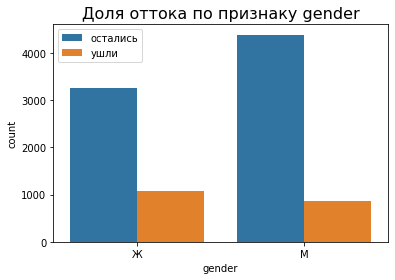

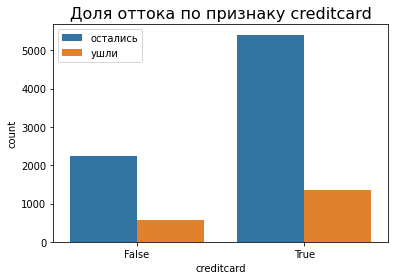

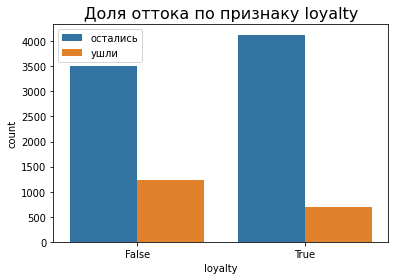

In [26]:
for column in ['city','gender','creditcard','loyalty']:
        ax = sns.countplot(data=data, x=column, hue='churn');
        plt.title(f'Доля оттока по признаку {column}', fontsize = 16, color = 'black')
        plt.legend(['остались', 'ушли'])
        plt.show()        

*Если смотреть процентное соотношение, то больше всего клиентов ушло из филиала в г.Ростов. Чаще уходят женщины, нежели мужчины, хотя разница невелика. И с кредитной картой и без уходили в одинаковом процентном соотношении к тем кто остался. А вот лояльные клиенты уходили реже, чем нелояльные.*

#### Корреляция признаков между собой

Для построения матрицы корреляций  столбцы с полом и городом приведем к булевому типу.

In [27]:
data['gender'] = data['gender'].map({'М':1, 'Ж':0})
data['city_new'] = data['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})
data = pd.get_dummies(data)
data.sample(5)

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_new,city_Ростов Великий,city_Рыбинск,city_Ярославль
4578,15844557,691,1,38,1,NaN,2,False,False,44653.50,False,0,0,0,1
2721,15619560,564,0,44,3,111760.40,3,True,True,104722.47,True,2,1,0,0
4936,15835722,580,1,24,1,133811.78,1,True,False,17185.95,True,2,1,0,0
61,15816205,687,0,27,9,152328.88,2,False,False,126494.82,False,2,1,0,0
9462,15780121,800,0,46,6,NaN,2,True,False,171928.04,False,1,0,1,0


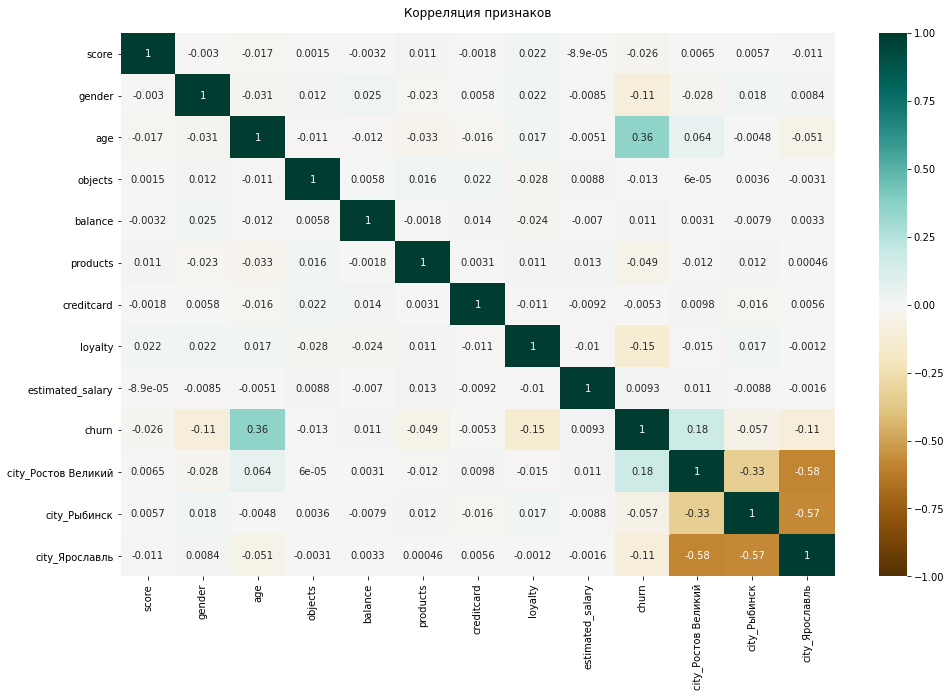

In [28]:
data_cor = data.drop(['userid', 'city_new'], axis=1)
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data_cor.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 

heatmap.set_title('Корреляция признаков', fontdict={'fontsize':12}, pad=16);

*Сильной зависимости между признаками не наблюдается. Больше всего отток коррелирует с возрастом, но зависимость всего 36%, поэтому утверждать о влиянии возраста на отток мы не можем.*

**В результате исследовательского анализа данных нам удалось составить среднестатистический портрет клиента банка:**  
- половина клиентов обслуживается в Ярославле
- 70% клиентов пользуются кредитной картой банка
- отток клиентов составил 20%
- лояльных клиентов 50%
- средний возраст клиентов 35-38 лет
- средний баланс на карте составляет 12-130 т.р.
- бОльшая часть клиентов пользуются 1-2мя продуктами
- средняя заработная плата составляет 100 т.р.
- клинты с 3мя продуктами чаще уходят, чем остаются
- клиенты с 4мя продуктами уходят в 100% случаев
- клиенты с кредитным рейтингом ниже 400 уходят из банка
- самый большой отток по филиалам г. Ростов Великий


### Сегментация клиентов по количеству потребляемых продуктов

Посмотрим на распределение клиентов по количеству потребляемых продуктов в процентном сотношении.

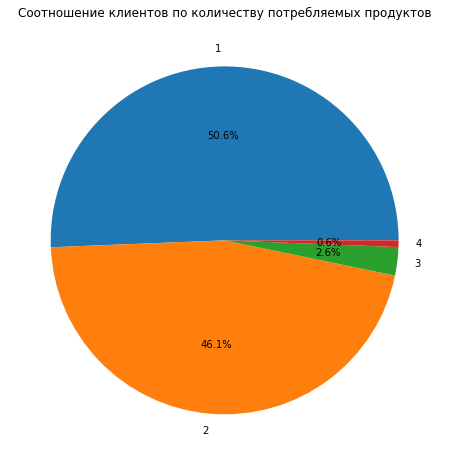

In [29]:
count_product = data.groupby('products')['products'].count()
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(count_product,labels=count_product.index, autopct='%1.1f%%')
ax1.set_title('Соотношение клиентов по количеству потребляемых продуктов');

Посмотрим на распределение признаков в разрезе количества потребляемых продуктов

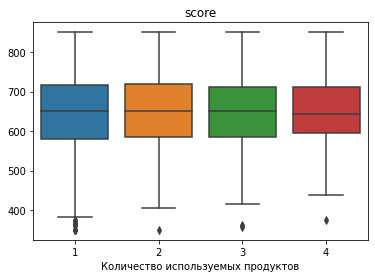

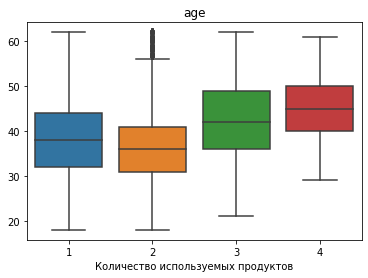

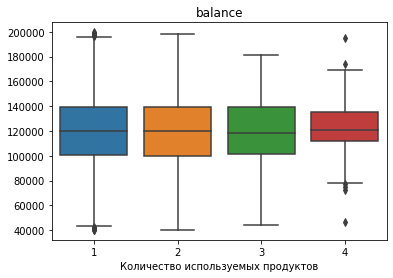

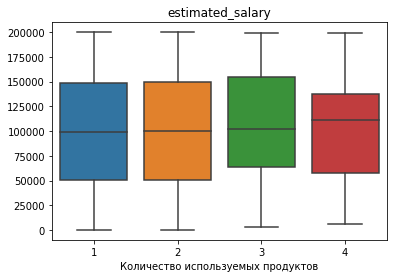

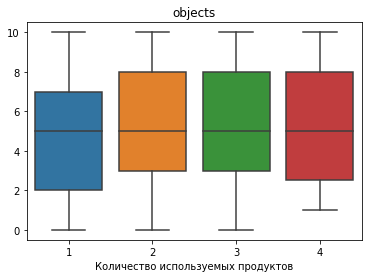

In [30]:
for column in ['score','age','balance','estimated_salary', 'objects']:
    plt.figure()
    sns.boxplot(data=data, y = column, x = 'products')
    plt.xlabel('Количество используемых продуктов')
    plt.ylabel('')
    plt.title(column)
    plt.show();

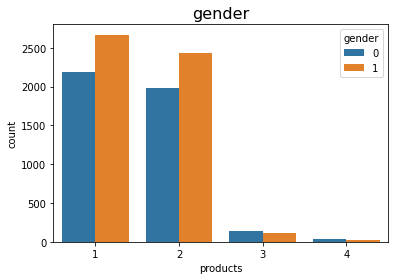

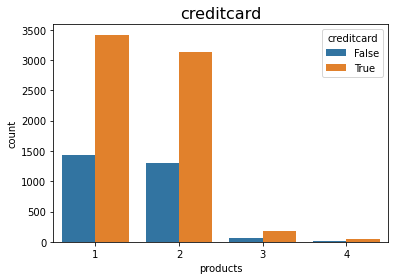

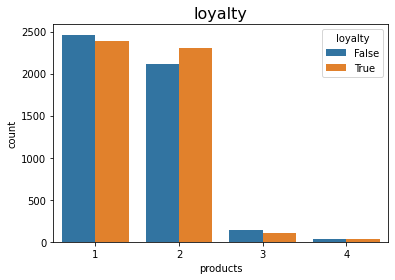

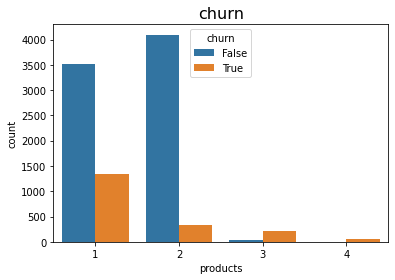

In [31]:
for column in ['gender','creditcard','loyalty', 'churn']:
        ax = sns.countplot(data=data, x='products', hue=column);
        plt.title(column, fontsize = 16, color = 'black')
        #plt.legend(['остались', 'ушли'])
        plt.show()

Посмотрим процент оттока клиентов по каждому сегменту.

In [32]:
churn = data.groupby('products').agg({'userid': 'count','churn': 'sum'}).reset_index()
churn['percent_churn'] = round(churn['churn']/churn['userid']*100)
churn

,products,userid,churn,percent_churn
0,1,4851,1342,28.0
1,2,4419,324,7.0
2,3,252,210,83.0
3,4,59,59,100.0


Посмотрим распределение пользователей по городам в зависимости от количества потребляемых продуктов

In [33]:
city = data.groupby('products').agg({'city_Ярославль': 'sum','city_Ростов Великий': 'sum', 'city_Рыбинск': 'sum'}).reset_index()
city

,products,city_Ярославль,city_Ростов Великий,city_Рыбинск
0,1,2400.0,1296.0,1155.0
1,2,2279.0,1000.0,1140.0
2,3,98.0,91.0,63.0
3,4,28.0,24.0,7.0


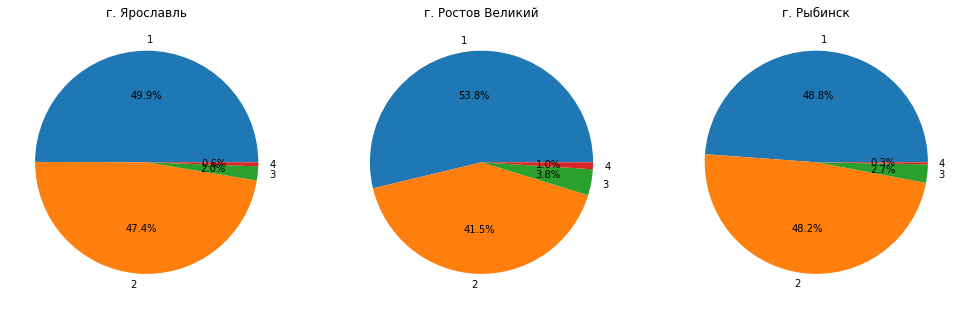

In [34]:
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(17,17) )
axs[0].pie(city['city_Ярославль'], labels=city['products'], autopct='%1.1f%%')#
axs[0].set_title('г. Ярославль')
axs[1].pie(city['city_Ростов Великий'], labels=city['products'], autopct='%1.1f%%')
axs[1].set_title('г. Ростов Великий')
axs[2].pie(city['city_Рыбинск'], labels=city['products'], autopct='%1.1f%%')
axs[2].set_title('г. Рыбинск')
plt.show();

**По результататам анализа и сегментации пользователей по количеству потребляемых продуктовб можно сделать следующий вывод:**

**Сегемент 1:** доля клиентов в этом сегменте составляет 50% от общего числа клиентов банка. В данном сегменте сосредоточена основная часть людей с низким кредитным ретингом (до 400). Средний возраст клиентов составляет 33-44 года. Средняя заработная плата составляет 100 т.р. Объектов в собственности, как правило, от 2 до 7. Клиентами чаще являются мужчины. Количество клиентов с кредитной картой в 2 раза больше, чем тех, кто ей не пользуется. Лояльных клиентов чуть меньше 50%. отток в данном сегменте составляет 28%

**Сегемент 2:** доля клиентов в данном сегменте составляет 46% от общего числа клиентов банка. Имеет самый молодой возраст- основная масса клиентов тут в возрасте от 30 до 40 лет. Кредитный рейтинг чаще всего от 600 до 700. Заработная плата идентична клиентам из сегмента 1, чаще от 50 до 150 т.р. Объектов в собственности обычно от 3 до 8. Мужчины, так же как и в сегменте 1, преобладают над женщинами. Кредитной картой пользуются около 70%. Лояльных клиентов тут больше, чем не лояльных. отток составляет 7%- самый низкий показатель среди всех сегментов.

**Сегемент 3:** По количеству клиентов, это один из малочисленных сегментов, доля клиентов банка составляет 2,6%. Чаще всего это клиенты старше 40 лет. Средний баланс на карте составляет 120 т.р. заработная плата в среднем от 70 до 160 т.р. Чаще всего в собственности имеют 5 объектов. Женщины не намного, но преобладают в данном сегменте. Кредитные карты, как и во всех сегментах составляют порядка 70%. Нелояльные клиенты преобладают в данном сегменте. Отток тут составляет 83% - один из самых худших показателей среди всех сегментов.

**Сегемент 4:** Это самый малочисленный сегмент из всех представленных, тут находится всего 59 человек, и это составляет 0,6% от всех клиентов банка. Кредитный рейтинг в среднем равен 650. Этот сегмент сильно отличается от всех предыдущих средним возрастом клиентов, в основном это люди от 40 до 50, и тут не встречается клиентов моложе 30. Заработная плата чаще всего от 60 до 135 т.р. В среднем имеют 5 объектов собственности. Как и в сегменте 3, чаще тут клиентами становятся женщины. Клиенты с кредитной картой так же, как и во всех сегментах, преобладают. Лояльных и нелояльных клиентов поровну. И самый худший показатель по оттоку именно в этом сегменте. Отток составляет 100%.


###  Проверка гипотез

#### Гипотеза №1

*Проверим гипотезу о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. Сформулируем нулевую и альтернативную гипотезы:*  
- Н_0: средний доход клиентов, пользующихся одним продуктом банка = среднему доходу клиентов, пользующихся двумя продуктами
- Н_а: средний доход клиентов, пользующихся одним продуктом банка ≠ среднему доходу клиентов, пользующихся двумя продуктами

In [35]:
product_1 = data[(data['products']==1)]['estimated_salary']
product_2 = data[(data['products']==2)]['estimated_salary']
print('Количество клиентов с 1 продуктом:',len(product_1))
print('Количество клиентов с 2 продуктами:',len(product_2))

Количество клиентов с 1 продуктом: 4851
Количество клиентов с 2 продуктами: 4419


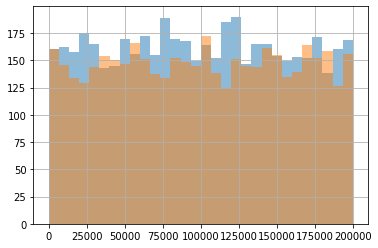

In [36]:
product_1.hist(bins = 30, alpha=0.5)
product_2.hist(bins = 30, alpha=0.5);

Полученные выборки достаточно велики и не зависимы друг от друга. Проверять гипотезу будем с помощью t-теста.

In [37]:
results = st.ttest_ind(product_1, product_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.47677914848674097
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось: разницы в доходах у клиентов с одним и двумя продуктами не наблюдается с большой долей вероятности.

#### Гипотеза №2

*Проверим гипотезу о разнице в среднем возрасте клиентов которые пользуются одним продуктом и теми, кто пользуется двумя*
- Н-0: средний возраст клиентов, использующих один продукт = среднему возрасту клиентов, использующих два продукта
- Н_а: средний возраст клиентов, пользующихся одним продуктом банка ≠ среднему возраст клиентов, пользующихся двумя продуктами

In [38]:
product_1 = data[(data['products']==1)]['age']
product_2 = data[(data['products']==2)]['age']

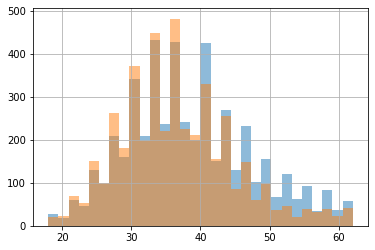

In [39]:
product_1.hist(bins = 30, alpha=0.5)
product_2.hist(bins = 30, alpha=0.5);

In [40]:
results = st.ttest_ind(product_1, product_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.6172135774937404e-25
Отвергаем нулевую гипотезу


В данном случае отвергаем нулевую гипотезу. Значит в среднем возрасте клиентов, пользующихся одним и двумя продуктами есть различие.

###  Общие выводы

<font size="3">
   <b>На основании проведённого анализа можно сделать следующие заключение:</b>
<br>- 96% клиентов имеют не более двух продуктов в банке, а те, кто имеют 3 и 4 продукта уходят с вероятностью 83% и 100%.
<br>- клиенты старше 40 лет более склонны к уходу из банка, независимо от количества используемых продуктов
<br>- в г.Ростов Великий самый большой отток клиентов в процентном соотношении 
<br>- лояльные клиенты реже уходят из банка
<br>- среди женщин отток выше, чем среди мужчин
    
<b>Относительно сегментации пользователей:</b>
<br>- <b>В сегменте с одним продуктом</b> больше всего клиентов - 50% от общего числа. БОльшая часть людей с кредитным рейтингом ниже 400 находится в этой группе, и все они ушли из банка. Средний возраст клиентов составляет 33-44 года. Клиентами чаще являются мужчины. Количество клиентов с кредитной картой в 2 раза больше, чем тех, кто ей не пользуется. Лояльных клиентов чуть меньше 50%. Отток в данном сегменте составляет 28%.
<br>- <b>Сегмент с двумя продуктами</b> является вторым по количеству клиентов банка - там их 46% от общего числа. Этот сегмент отличается молодым возрастом - основная масса клиентов тут в возрасте от 30 до 40 лет. Мужчины, так же как и в сегменте 1, преобладают над женщинами. Кредитной картой пользуются около 70%. Лояльных клиентов тут больше, чем не лояльных. Отток составляет 7%- самый низкий показатель среди всех сегментов.
<br>- <b>В сегмент с тремя продуктами</b> попадают всего 2,6% клиентов. Чаще всего это клиенты старше 40 лет. Женщины не намного, но преобладают в данном сегменте. Кредитные карты, как и во всех сегментах составляют порядка 70%. Нелояльные клиенты преобладают в данном сегменте. Отток тут составляет 83% - один из самых худших показателей среди всех сегментов.
<br>- <b>Сегмент с четырьмя продуктами</b> самый малочисленный, всего 59 человек - 0,6% от всех клиентов банка. Этот сегмент сильно отличается от всех предыдущих средним возрастом клиентов, в основном это люди от 40 до 50, и тут не встречается клиентов моложе 30. Заработная плата чаще всего от 60 до 135 т.р. Как и в сегменте 3, чаще тут клиентами становятся женщины. Клиенты с кредитной картой так же, как и во всех сегментах, преобладают. Лояльных и нелояльных клиентов поровну. И самый худший показатель по оттоку именно в этом сегменте. Отток составляет 100%.

<b>В результате проверки гипотез удалось выяснить:</b>
<br>- что разницы в средней заработной плате между клиентами с одним продуктом и двумя нет
<br>- средний возраст в сегменте с одним количеством продуктов, отличается от среднего возраста клиентов с двумя продуктами

<b>Рекомендации:</b>
<br>- Для клиентов с 1 продуктом: активно предлагать дополнительный продукт, так как клиенты с двумя продуктами имеют самый низкий отток. Разработать продукт для клиентов с кредитным рейтингом ниже 400, так как основная часть таких клиентов сосредоточена в этом сегменте и все они покинули банк.
<br>- Для клиентов с 2 продуктами: учитывая специфику возраста данного сегмента, разработать продукты для молодых людей и активно их предлагать, а так же увеличивать лояльность в данном сегменте.
<br>- Для клиентов с 3 продуктами: так как в данном сегменте мы наблюдаем большой отток, стоит выяснить причину качества предлагаемых продуктов. 
<br>- Для клиентов с 4 продуктами: тут необходимо провести детальный анализ используемых клиентами продуктов и выяснить причину тотального оттока. Возможно, причина кроется в использовании всеми клиентами одного продукта, который повлиял на уход.
</font>